In [1]:
#Importar en csv Test 2%
import pandas as pd
data_test=pd.read_csv('DataTest2%.csv')

In [2]:
coautores=[]
#########################
coautor=data_test.Coautor
#########################
coautor.reset_index(drop=True, inplace=True)
for r in coautor:
    sep= r.split(',')
    m= len(sep)
    aux=[]
    for i in range(0,m):
        if i==m-1:
            aux.append(int(sep[i][2:-2]))
        else:
            aux.append(int(sep[i][2:-1]))
    coautores.append(aux)

In [3]:
len(coautores)

3151

In [4]:
#Leer los abstracts del data test
#abstract
ab=[]
############################
abstract=data_test.Abstract
############################
abstract.reset_index(drop=True, inplace=True)

for r in abstract:
    sep= r.split(',')
    m= len(sep)
    aux=[]
    for i in range(0,m):
        if i==m-1:
            aux.append(sep[i][2:-2])
        else:
            aux.append(sep[i][2:-1])
    ab.append(aux)
len(ab)

3151

In [5]:
ab[0]

['fluctuations',
 'glacier',
 'mass',
 'volume',
 'indicative',
 'changes',
 'climate',
 'system',
 'also',
 'strongly',
 'affect',
 'regional',
 'climate',
 'hydrology',
 'explore',
 'possible',
 'relationships',
 'radial',
 'growth',
 'schrenk',
 'spruce',
 'picea',
 'schrenkiana',
 'fisch',
 'et',
 'mey',
 'mass',
 'balance',
 'tsentralniy',
 'tuyuksuyskiy',
 'ts',
 'tuyuksuyskiy',
 'glacier',
 'located',
 'northern',
 'slopes',
 'tianshan',
 'mountains',
 'arid',
 'central',
 'asia',
 'attempt',
 'reconstruct',
 'historical',
 'mass',
 'balance',
 'variability',
 'ts',
 'tuyuksuyskiy',
 'glacier',
 'using',
 'tree-ring',
 'widths',
 'stable',
 'carbon',
 'isotope',
 'chronologies',
 'reconstruction',
 'able',
 'explain',
 '62.1',
 'variance',
 'annual',
 'glacier',
 'mass',
 'balance',
 'record',
 '1965–2014',
 'calibration',
 'period',
 'also',
 'analyzed',
 'centennial',
 'mass',
 'balance',
 'variability',
 'linkages',
 'climate',
 'change',
 'ts.tuyuksuyskiy',
 'glacier',
 'neg

In [6]:
#Lemmatize Stemming
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

In [7]:
data_preprocess_1=[]
data_preprocess_2=[]

for line in ab:
    #word_tokens = word_tokenize(tittle)
    data=[lemmatizer.lemmatize(t) for t in line]
    data_preprocess_1.append(data)
    
for line in data_preprocess_1:
    data=[stemmer.stem(t) for t in line]
    data_preprocess_2.append(data)

In [8]:
len(data_preprocess_2)

3151

In [9]:
data_preprocess_2[0]

['fluctuat',
 'glacier',
 'mass',
 'volum',
 'indic',
 'chang',
 'climat',
 'system',
 'also',
 'strong',
 'affect',
 'region',
 'climat',
 'hydrolog',
 'explor',
 'possibl',
 'relationship',
 'radial',
 'growth',
 'schrenk',
 'spruce',
 'picea',
 'schrenkiana',
 'fisch',
 'et',
 'mey',
 'mass',
 'balanc',
 'tsentralniy',
 'tuyuksuyskiy',
 't',
 'tuyuksuyskiy',
 'glacier',
 'locat',
 'northern',
 'slope',
 'tianshan',
 'mountain',
 'arid',
 'central',
 'asia',
 'attempt',
 'reconstruct',
 'histor',
 'mass',
 'balanc',
 'variabl',
 't',
 'tuyuksuyskiy',
 'glacier',
 'use',
 'tree-r',
 'width',
 'stabl',
 'carbon',
 'isotop',
 'chronolog',
 'reconstruct',
 'abl',
 'explain',
 '62.1',
 'varianc',
 'annual',
 'glacier',
 'mass',
 'balanc',
 'record',
 '1965–2014',
 'calibr',
 'period',
 'also',
 'analyz',
 'centenni',
 'mass',
 'balanc',
 'variabl',
 'linkag',
 'climat',
 'chang',
 'ts.tuyuksuyskiy',
 'glacier',
 'negat',
 'annual',
 'mass',
 'balanc',
 'year',
 'sinc',
 '1968',
 'undergon

In [10]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
dictionary = gensim.corpora.Dictionary(data_preprocess_2)
#dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in data_preprocess_2]

In [11]:
lda_model_abs =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 20, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [12]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_abs, texts=data_preprocess_2, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.40623744928914063


In [13]:
lda_model_abs.print_topics()

[(0,
  '0.008*"use" + 0.008*"2018" + 0.007*"studi" + 0.006*"elsevi" + 0.006*"plant" + 0.006*"result" + 0.006*"model" + 0.005*"show" + 0.005*"dm" + 0.005*"organ"'),
 (1,
  '0.011*"use" + 0.008*"studi" + 0.007*"p" + 0.006*"2018" + 0.006*"activ" + 0.006*"level" + 0.005*"health" + 0.005*"physic" + 0.005*"result" + 0.005*"ptsd"'),
 (2,
  '0.010*"use" + 0.008*"soil" + 0.007*"studi" + 0.007*"activ" + 0.005*"effect" + 0.005*"2018" + 0.005*"result" + 0.005*"patient" + 0.005*"show" + 0.005*"cell"'),
 (3,
  '0.009*"use" + 0.009*"studi" + 0.007*"sampl" + 0.007*"2018" + 0.006*"group" + 0.006*"result" + 0.006*"effect" + 0.005*"p" + 0.005*"elsevi" + 0.005*"signific"'),
 (4,
  '0.008*"associ" + 0.008*"p" + 0.007*"year" + 0.007*"depress" + 0.007*"patient" + 0.006*"studi" + 0.006*"2018" + 0.006*"2" + 0.006*"id" + 0.005*"clinic"'),
 (5,
  '0.008*"use" + 0.008*"studi" + 0.007*"2018" + 0.006*"differ" + 0.006*"elsevi" + 0.005*"effect" + 0.005*"composit" + 0.005*"result" + 0.004*"model" + 0.004*"structur"'),

In [14]:
#Sacar los topics
prueba=[]
for r in data_preprocess_2:
    vector=dictionary.doc2bow(r)
    var=sorted(lda_model_abs[vector], key=lambda tup: -1*tup[1])
    resultado=lda_model_abs.print_topic(var[0][0])
    sep= resultado.split('"')
    #print (sep)
    #m= len(sep)
    aux=[]
    for i in range(0,8):
        if i%2==1:
            aux.append(sep[i])
    prueba.append(aux)

In [16]:
len (prueba)

3151

In [15]:
prueba[0]

['associ', 'p', 'year', 'depress']

In [17]:
def levenshteinDistance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        distances_ = [i2+1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
        distances = distances_
    return distances[-1]

In [18]:
abst=[]
for r in prueba:
    #print(r)
    aux=' '.join(r)
    abst.append(aux)
len(abst) 

3151

In [20]:
abst[0]

'associ p year depress'

In [27]:
ind=0
indice=0
print(abst[ind])
print(abst[indice])
dist=levenshteinDistance(abst[ind],abst[indice])
dist

associ p year depress
associ p year depress


0

In [33]:
max(len(abst[ind]),len(abst[indice]))

21

In [34]:
len(abst[indice])

21

In [35]:
import community
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
#Creación de grafo con peso de titulo
g_abs=nx.Graph()
ind=0
###############################
autor=data_test.IdAutor
###############################
autor.reset_index(drop=True, inplace=True)

for node in autor:
    g_abs.add_node(node)

for edge in coautores:
    #counter=Counter(edge)
    #dist=levenshteinDistance()
    for elem in edge:
        encontrado=0
        if elem == autor[ind]:
            encontrado=0
        else:
            for a in autor:
                if elem== a:
                    encontrado=1
        if encontrado:
            n=0
            for item in autor:
                if (item==elem):
                    indice=n
                    break
                n+=1
            dist=levenshteinDistance(abst[ind],abst[indice])
            #Normalizando
            peso=1-(dist/max(len(abst[ind]),len(abst[indice])))
            g_abs.add_edge(autor[ind], elem, weight=peso)
    ind+=1
    if (ind%100)==0: print (ind)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


In [36]:
print (nx.info(g_abs))

Name: 
Type: Graph
Number of nodes: 3151
Number of edges: 172
Average degree:   0.1092


3147.0
0.7445999999999999


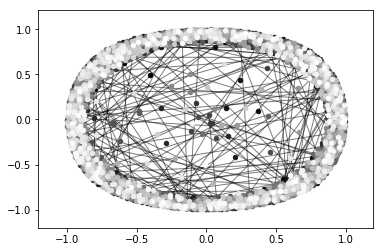

In [45]:
import community
import networkx as nx
import matplotlib.pyplot as plt

G=g_abs
#first compute the best partition
partition = community.best_partition(G,weight='weight')
mod_abs=community.modularity(partition,G)
#drawing
size = float(len(set(partition.values())))
print(size)
print(mod_abs)
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

2985.0
0.9925219114032436


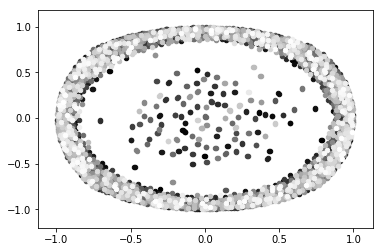

In [37]:
import community
import networkx as nx
import matplotlib.pyplot as plt

G=g_abs
#first compute the best partition
partition = community.best_partition(G,weight='weight')
mod_abs=community.modularity(partition,G)
#drawing
size = float(len(set(partition.values())))
print(size)
print(mod_abs)
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [38]:
#Leer los titulo del data test
#titulo
titu=[]
############################
tittle=data_test.Titulo
############################
tittle.reset_index(drop=True, inplace=True)

for r in tittle:
    sep= r.split(',')
    m= len(sep)
    aux=[]
    for i in range(0,m):
        if i==m-1:
            aux.append(sep[i][2:-2])
        else:
            aux.append(sep[i][2:-1])
    titu.append(aux)
len(titu)

3151

In [48]:
titu[0]

['tree',
 'ring-based',
 'record',
 'annual',
 'mass',
 'balance',
 'changes',
 'ts.tuyuksuyskiy',
 'glacier',
 'linkages',
 'climate',
 'change',
 'tianshan',
 'mountains']

In [46]:
data_preprocess_1=[]
data_preprocess_2=[]

for line in titu:
    #word_tokens = word_tokenize(tittle)
    data=[lemmatizer.lemmatize(t) for t in line]
    data_preprocess_1.append(data)
    
for line in data_preprocess_1:
    data=[stemmer.stem(t) for t in line]
    data_preprocess_2.append(data)

In [47]:
data_preprocess_2[0]

['tree',
 'ring-bas',
 'record',
 'annual',
 'mass',
 'balanc',
 'chang',
 'ts.tuyuksuyskiy',
 'glacier',
 'linkag',
 'climat',
 'chang',
 'tianshan',
 'mountain']

In [49]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
dictionary = gensim.corpora.Dictionary(data_preprocess_2)
#dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in data_preprocess_2]
lda_model_tittle =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 20, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [50]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_tittle, texts=data_preprocess_2, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3679221413187872


In [51]:
lda_model_tittle.print_topics()

[(0,
  '0.018*"effect" + 0.010*"rat" + 0.009*"dot" + 0.009*"quantum" + 0.007*"energi" + 0.007*"evalu" + 0.006*"metabol" + 0.006*"novel" + 0.006*"differ" + 0.006*"respons"'),
 (1,
  '0.010*"phosphat" + 0.010*"use" + 0.009*"calcium" + 0.009*"cell" + 0.008*"nanoparticl" + 0.007*"studi" + 0.007*"impact" + 0.007*"adhes" + 0.007*"human" + 0.007*"prolifer"'),
 (2,
  '0.014*"effect" + 0.013*"high" + 0.011*"base" + 0.010*"differenti" + 0.009*"activ" + 0.008*"analysi" + 0.007*"temperatur" + 0.007*"factor" + 0.006*"mechan" + 0.006*"carbon"'),
 (3,
  '0.016*"use" + 0.016*"membran" + 0.012*"system" + 0.008*"via" + 0.008*"base" + 0.007*"enhanc" + 0.007*"network" + 0.007*"dynam" + 0.006*"model" + 0.006*"curcumin"'),
 (4,
  '0.018*"effect" + 0.017*"properti" + 0.016*"film" + 0.012*"thermal" + 0.010*"method" + 0.008*"use" + 0.008*"thin" + 0.008*"base" + 0.007*"structur" + 0.007*"diffus"'),
 (5,
  '0.015*"co" + 0.012*"co2" + 0.011*"photocatalyt" + 0.011*"select" + 0.011*"properti" + 0.010*"new" + 0.010*

In [52]:
#Sacar los topics
prueba=[]
for r in data_preprocess_2:
    vector=dictionary.doc2bow(r)
    var=sorted(lda_model_tittle[vector], key=lambda tup: -1*tup[1])
    resultado=lda_model_tittle.print_topic(var[0][0])
    sep= resultado.split('"')
    #print (sep)
    #m= len(sep)
    aux=[]
    for i in range(0,8):
        if i%2==1:
            aux.append(sep[i])
    prueba.append(aux)

In [53]:
prueba[0]

['effect', 'zebrafish', 'model', 'mechan']

In [54]:
titulo=[]
for r in prueba:
    #print(r)
    aux=' '.join(r)
    titulo.append(aux)
len(titulo) 

3151

In [55]:
import community
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
#Creación de grafo con peso de titulo
g_tittle=nx.Graph()
ind=0
###############################
autor=data_test.IdAutor
###############################
autor.reset_index(drop=True, inplace=True)

for node in autor:
    g_tittle.add_node(node)

for edge in coautores:
    counter=Counter(edge)
    #dist=levenshteinDistance()
    for elem in counter:
        encontrado=0
        if elem == autor[ind]:
            encontrado=0
        else:
            for a in autor:
                if elem== a:
                    encontrado=1
        if encontrado:
            n=0
            for item in autor:
                if (item==elem):
                    indice=n
                    break
                n+=1
            dist=levenshteinDistance(titulo[ind],titulo[indice])
            #Normalizando
            peso=1-(dist/max(len(titulo[ind]),len(titulo[indice])))
            g_tittle.add_edge(autor[ind], elem, weight=peso)
    ind+=1
    if (ind%100)==0: print (ind)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


2985.0
0.9926468060621896


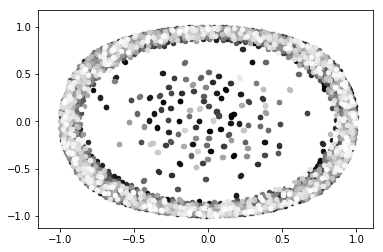

In [56]:
import community
import networkx as nx
import matplotlib.pyplot as plt

G=g_tittle
#first compute the best partition
partition = community.best_partition(G,weight='weight')
mod_tittle=community.modularity(partition,G)
#drawing
size = float(len(set(partition.values())))
print(size)
print(mod_tittle)
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [73]:
#keywords
key=[]
keyword=data_test.Keyword
keyword.reset_index(drop=True, inplace=True)

for r in keyword:
    sep= r.split(',')
    m= len(sep)
    aux=[]
    for i in range(0,m):
        if i==m-1:
            aux.append(sep[i][2:-2])
        else:
            aux.append(sep[i][2:-1])
    key.append(aux)

In [74]:
key[0]

['Annual mass balance reconstruction',
 ' Arid central asia',
 ' Climate change',
 ' Tianshan mountains',
 ' Tree rings',
 ' TS.Tuyuksuyskiy glacier']

In [75]:
data_preprocess_1=[]
data_preprocess_2=[]

for line in key:
    #word_tokens = word_tokenize(tittle)
    data=[lemmatizer.lemmatize(t) for t in line]
    data_preprocess_1.append(data)
    
for line in data_preprocess_1:
    data=[stemmer.stem(t) for t in line]
    data_preprocess_2.append(data)

In [76]:
data_preprocess_2[0]

['annual mass balance reconstruct',
 ' arid central asia',
 ' climate chang',
 ' tianshan mountain',
 ' tree r',
 ' ts.tuyuksuyskiy glaci']

In [77]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
dictionary = gensim.corpora.Dictionary(data_preprocess_2)
#dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in data_preprocess_2]
lda_model_key =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 20, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [78]:
lda_model_key.print_topics()

[(0,
  '0.015*" staphylococcus aureus" + 0.014*" sigb" + 0.014*" membrane vesicl" + 0.014*" rhodomyrton" + 0.014*"haemolytic act" + 0.012*" nanoparticl" + 0.011*" calcium phosph" + 0.008*" cell adhes" + 0.008*" scaffold" + 0.008*" electron beam melt"'),
 (1,
  '0.007*" software defined network" + 0.007*" neural network" + 0.007*"dynamic wavelength and bandwidth alloc" + 0.007*" wdm/tdm-pon" + 0.006*" hepatocellular carcinoma" + 0.006*" synthesi" + 0.006*" mental health" + 0.006*" mapk pathway" + 0.006*"flotillin 1" + 0.006*" mir-6809-5p"'),
 (2,
  '0.006*"alcohol" + 0.006*" prenat" + 0.006*" brain structur" + 0.006*" energy metabol" + 0.006*" body composit" + 0.005*"erp" + 0.005*" factive verb" + 0.005*" presupposit" + 0.005*" n400" + 0.005*" p600"'),
 (3,
  '0.008*"2d spatial autocorrelation analysi" + 0.008*" fractal dimens" + 0.008*" coherent anti-stokes raman scattering (cars) microscopi" + 0.008*" stimulated emission depletion (sted) microscopi" + 0.008*" super-resolution microsco

In [79]:
#Sacar los topics
prueba=[]
for r in data_preprocess_2:
    vector=dictionary.doc2bow(r)
    var=sorted(lda_model_key[vector], key=lambda tup: -1*tup[1])
    resultado=lda_model_key.print_topic(var[0][0])
    sep= resultado.split('"')
    #print (sep)
    #m= len(sep)
    aux=[]
    for i in range(0,8):
        if i%2==1:
            aux.append(sep[i])
    prueba.append(aux)

In [80]:
kw=[]
for r in prueba:
    #print(r)
    aux=' '.join(r)
    kw.append(aux)
len(kw) 

3151

In [81]:
kw[0]

'antibacteri  electrospin  osteogenesi  guided bone regener'

In [82]:
import community
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
#Creación de grafo con peso de titulo
g_key=nx.Graph()
ind=0
###############################
autor=data_test.IdAutor
###############################
autor.reset_index(drop=True, inplace=True)

for node in autor:
    g_key.add_node(node)

for edge in coautores:
    counter=Counter(edge)
    #dist=levenshteinDistance()
    for elem in counter:
        encontrado=0
        if elem == autor[ind]:
            encontrado=0
        else:
            for a in autor:
                if elem== a:
                    encontrado=1
        if encontrado:
            n=0
            for item in autor:
                if (item==elem):
                    indice=n
                    break
                n+=1
            dist=levenshteinDistance(kw[ind],kw[indice])
            #Normalizando
            peso=1-(dist/max(len(kw[ind]),len(kw[indice])))
            g_key.add_edge(autor[ind], elem, weight=peso)
    ind+=1
    if (ind%100)==0: print (ind)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


2985.0
0.9925738859765015


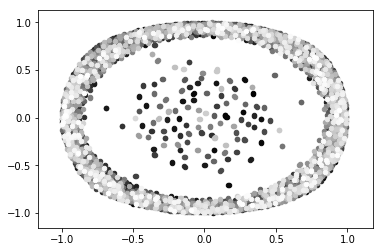

In [83]:
import community
import networkx as nx
import matplotlib.pyplot as plt

G=g_key
#first compute the best partition
partition = community.best_partition(G,weight='weight')
mod_key=community.modularity(partition,G)
#drawing
size = float(len(set(partition.values())))
print(size)
print(mod_key)
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [85]:
#juntar keywords (kw) abstract (abst) tittle(text) KWR
#total kwr kw
i=0
kwr=[]
for k in key:
    kwr.append(ab[i]+titu[i]+key[i])
    i+=1
len(kwr)

3151

In [86]:
data_preprocess_1=[]
data_preprocess_2=[]

for line in kwr:
    #word_tokens = word_tokenize(tittle)
    data=[lemmatizer.lemmatize(t) for t in line]
    data_preprocess_1.append(data)
    
for line in data_preprocess_1:
    data=[stemmer.stem(t) for t in line]
    data_preprocess_2.append(data)

In [87]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
dictionary = gensim.corpora.Dictionary(data_preprocess_2)
#dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in data_preprocess_2]
lda_model_kwr =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 20, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [88]:
lda_model_kwr.print_topics()

[(0,
  '0.009*"scale" + 0.007*"use" + 0.007*"2018" + 0.006*"result" + 0.006*"measur" + 0.005*"correl" + 0.005*"studi" + 0.005*"alcohol" + 0.005*"p" + 0.005*"effect"'),
 (1,
  '0.025*"cell" + 0.011*"activ" + 0.008*"express" + 0.008*"effect" + 0.008*"increas" + 0.006*"studi" + 0.006*"2018" + 0.005*"use" + 0.004*"level" + 0.004*"potenti"'),
 (2,
  '0.010*"soil" + 0.009*"effect" + 0.008*"studi" + 0.008*"use" + 0.006*"result" + 0.006*"2018" + 0.005*"high" + 0.005*"elsevi" + 0.004*"differ" + 0.004*"base"'),
 (3,
  '0.007*"result" + 0.007*"surfac" + 0.007*"2018" + 0.006*"effect" + 0.006*"use" + 0.005*"high" + 0.005*"studi" + 0.005*"activ" + 0.005*"elsevi" + 0.004*"increas"'),
 (4,
  '0.007*"use" + 0.007*"s." + 0.006*"2018" + 0.005*"studi" + 0.004*"vaccin" + 0.004*"differ" + 0.004*"speci" + 0.004*"result" + 0.004*"model" + 0.004*"measur"'),
 (5,
  '0.010*"use" + 0.007*"2018" + 0.006*"program" + 0.006*"health" + 0.006*"studi" + 0.006*"effect" + 0.005*"result" + 0.004*"time" + 0.004*"elsevi" + 0

In [89]:
#Sacar los topics
prueba=[]
for r in data_preprocess_2:
    vector=dictionary.doc2bow(r)
    var=sorted(lda_model_kwr[vector], key=lambda tup: -1*tup[1])
    resultado=lda_model_kwr.print_topic(var[0][0])
    sep= resultado.split('"')
    #print (sep)
    #m= len(sep)
    aux=[]
    for i in range(0,8):
        if i%2==1:
            aux.append(sep[i])
    prueba.append(aux)

In [90]:
kwr2=[]
for r in prueba:
    #print(r)
    aux=' '.join(r)
    kwr2.append(aux)
len(kwr2) 

3151

In [91]:
import community
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
#Creación de grafo con peso de titulo
g_kwr=nx.Graph()
ind=0
###############################
autor=data_test.IdAutor
###############################
autor.reset_index(drop=True, inplace=True)

for node in autor:
    g_kwr.add_node(node)

for edge in coautores:
    counter=Counter(edge)
    #dist=levenshteinDistance()
    for elem in counter:
        encontrado=0
        if elem == autor[ind]:
            encontrado=0
        else:
            for a in autor:
                if elem== a:
                    encontrado=1
        if encontrado:
            n=0
            for item in autor:
                if (item==elem):
                    indice=n
                    break
                n+=1
            dist=levenshteinDistance(kwr2[ind],kwr2[indice])
            #Normalizando
            peso=1-(dist/max(len(kwr2[ind]),len(kwr2[indice])))
            g_kwr.add_edge(autor[ind], elem, weight=peso)
    ind+=1
    if (ind%100)==0: print (ind)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


2985.0
0.992569964529214


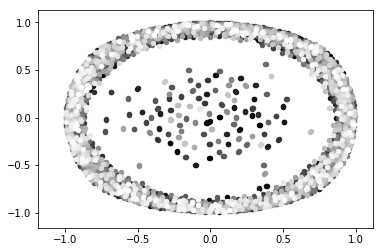

In [92]:
import community
import networkx as nx
import matplotlib.pyplot as plt

G=g_kwr
#first compute the best partition
partition = community.best_partition(G,weight='weight')
mod_kwr=community.modularity(partition,G)
#drawing
size = float(len(set(partition.values())))
print(size)
print(mod_kwr)
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()